# Introduction
After reading through this tutorial you will understand what is MPL, when and how to use it, when not to use it, and how to get help.

## What is MPL
MPL is the most popular plotting library for python. It was written John D. Hunter in 2003 in attempt to provide plotting functionality similar to what is available in MATLAB, which at that time was the most used programming language in academia.

MPL offers a hierarchy classes abstracting various elements of a plot, starting from the high-level ones, such as `Figure` and `Axes`, through `Scatter`, to `Line` and `Marker` all the way down to `Canvas` in an orgasnized object oriented interface. In order to produce a plot on the screen the MPL `Figure` instance must be coupled to one of the supported user interface backends, such as TkInter, Qt, WxWidgets or MacOs. Outside of MPL documentation user interface backends are more often than not referred to as "interactive". In order to produce a file on a disk MPL uses hardcopy backends for a variety of bitmap (png, jpg, gif) and vector (ps, ps, svg) file formats. Hardcopy backends are also called "non-interactive".

MPL offers the `pyplot` state machine which allows to write concise procedural code.  Pyplot decides the object to apply the relevant method from the context or creates the necessary objects if they don't exist. This allows for fast experimentation but result in less reusable and less maintainable code. Pyplot inerface 

In practice it is almost impossible to use MPl without pyplot. MPL user guide advices to use pyplot only to create figures and axes, and, once those are created, use their respective methods to create plots. This is reasonable, and we stick to this style in this tutorial, however I would advice avoiding following it too rigidly when exploring new data. Remembering or having to look up which methods belong to which objects interrupts the flow of analytical thought and negatively affects productivity. The intial code can easily easily converted to object-oriented style once you have finished exploring the data and know what visualizations you are going to need. 

Ability to combine this two styles leads to a great flexibility --- according to the library maintainers, MPL tries to make easy things easy and hard things possible.




## When to use MPL
The question is, what things are hard and what are easy in MPL world?
There are two areas where MPL is particularly powerful:
+ exploratory data analysis;
+ scientific plotting for publication.

MPL strength for exploratory data analysis comes from the pyplot interface. With MPL you can generate a variety of plots with a small number of keystrokes and interactively augment existing figures with new data. Besides, `seaborn` library  built on top of MPL provides even more visualizations with built-in data analysis (such as linear regression, contour plots, or kernel density estimation).

The second area of MPL's excellence is data visualizations for publication. It can generate vector images in a variety of formats using its hardcopy (non-interactive) backends. When generating bitmap images MPL provides aesthetically pleasing rendering using Anti Grain Geometry (Agg). The default selection of axis annotations, fonts and ability to render mathematical notation using LaTeX syntax make it perfect for preparing figures for scientific journals or homework.


## When not to use MPL
It is true that you can create interactive graphical user intefaces with realtime updates. But from the first-hand experience I can tell that it's better to use different tools for that.

I would advice against using MPL for:
- graphical user interfaces, use pyforms instead;
- interactive visualization for web, use bokeh;
- large datasets, use vispy.


## Purpose of data visualization
The purpose of data visualization is to give life humans an *insight* into the data, so that they can *understand* it. We don't understand the data when it's a pile of numbers, in order to  understand something about it we must be able to see it.   


<center><h4> I see: </h4></center>

![an image of a data print-out](screenshot.png)

<center><h4> I understand: </h4></center>
<center><h2> Nothing. </h2></center>

On the other hand, when we choose a proper visualization technique, the important things become self-evident.

<center><h4> I see: </h4></center>

![an image of a data  print-out](pyramid.png)

<center><h4> I understand: </h4></center>
<center><h3> It's a triangle! (And the top is at 1.00)</h3></center>

Above may be stating the obvious, but it's worth keeping in mind during the entire visulization workflow, starting with data transormations and ending with the choice of file format to save the images.

## We see in 2D
Our eye's retina is a thin sheet with light-sensitive photoreceptor cells.
The relative positions between photoreceptors change very slowly and can be thought of as constant. Two numbers and a reference point on the retina is enough to find any given light-sensitive cell so retina and this means that our sight is essentially two-dimensional.



![Cone mosaics](ConeMosaics.jpg)
<center> <h5> Retinal mosaic: distribution of red, green and blue photoreceptor cells in the center of retina of a person with normal vision (left) and a color-blind person (right). Image by Mark Fairchild under Creative Commons Attribution Share-Alike 3.0 License. </h5> </center>

But what about stereo vision, after all we live in a three-dimensional world? 
Yes we live in a 3D world but we never see all of it. We don't see the inside of the 3D objects. This is why we need X-ray, sonars, magnetic resonance and ultrasound machines. What we see with our eyes are just *surfaces* of objects and these are, again, two dimensional manifolds -- you need only two numbers and a reference point to address any point on a surface.

Data, on the other hand, can have any number of dimensions. The best way to understand the data is to examine a two-dimensional representation of it.

# Setup

## Installation
Assuming you have your python development environment set up,
install matplotlib using the python package manager of your choice. If you don't use one, start now!
I highly recommend conda package manager that you can get by installing miniconda. 
```bash
conda install matplotlib
```
in terminal or windows PowerShell will install matplotlib and all the dependencies. If you use pip
```
pip install matplotlib
```
would do the job.

## Backends and interaction setup
MPL has supports backends -- a concept that can be quite confusing for new users.

MPL can be used for many different things including saving the visualizations results of long-running calculations for later review online, these use cases are non-interactive and use the so called hardcopy backends. If your matplotlib came preinstalled it might be that it is using one of the hardcopy backends by default. In this case you will not see anything when issuing plotting commands.

In this tutorial we will use MPL interactively to see the results of our actions immediately. This means that we need to use a user interface backend. If you installed matplotlib yourself the default backend would be chosen to match one of the supported GUI frameworks , such as Qt, WxWidgets or Cacao available on your computer. Tcl/Tk framework comes alongside with most python installations. To be on the safe side for this tutorial we use a backend that you are almost guaranteed to have.


In [2]:
import matplotlib as mpl
#mpl.use('TkAgg')

These statements must come before we import `pyplot`, otherwise they will have no effect as the default backend would be chosen during pyplot import.
Use of a user interface ("interactive") backend is not enough. If we were to use only the commands above we would have to call `pyplot.show()` everytime we want to see our plots. What's worse is that we would not be able to enter any python commands until we close the figure window. 
To be able to interact both with the our plots and with python we need to turn on the interactive mode:

In [3]:
import matplotlib.pyplot as plt
# plt.ion() # turn on interactive mode

### Jupyter notebook

If you are using (properly configured) Jupyter notebook you may skip the above setup and you will have your figures rendered in the output cells of the notebook. Just make sure to input all code from each block in our examples into a single cell.

## Additional setup

MPL is numpy-aware and is using it under the hood. For the purposes of simple data manipulation we import numpy

In [4]:
import numpy as np

# Visualization techniques


## 1D Data
Statistical distributions are a typical example of 1D data. What you want to do is transfrom your data so that you have another dimension. By far the most common way to do this is to categorize data and count the frequency of items in the categories. In case of continuous distributions categories could be defined by splitting the data range into intervals of equals size. This is the well know as a histogram.

Let's generate some normally distributed data and see what values are most common:

In [4]:
data = np.random.randn(10000)
print(data)
np.savetxt('random_normal.csv',data)


[ 0.19169277  1.02762739 -0.85618785 ... -0.52753706 -0.53751188
 -0.49773899]


Text(0,0.5,'counts')

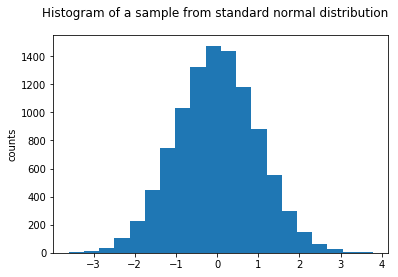

In [5]:
fig, ax = plt.subplots()
ax.hist(data,bins=20)
fig.suptitle('Histogram of a sample from standard normal distribution')
ax.set_ylabel('counts')

We see that values around 0 are the most common. We also see that FWHW is about 3.
The `hist()` function above calls numpy.histogram() under the hood to count the number of data points in respective bins.



In [6]:
# and then creates Patch graphical objects to visualize them

For categorical or integer variables you will have to do your own counting and call the `bar()` function. For example:

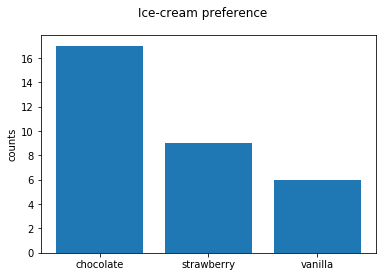

In [7]:
responses = ['chocolate','chocolate', 'vanilla','chocolate', 'strawberry', 'strawberry','chocolate', 'vanilla', 'vanilla','chocolate','strawberry', 
            'chocolate',  'strawberry', 'chocolate','chocolate', 'chocolate','chocolate', 'strawberry', 'chocolate','strawberry', 'vanilla', 'vanilla',
            'chocolate','chocolate','strawberry', 'chocolate','strawberry', 'vanilla','chocolate','chocolate','chocolate','strawberry']
flavors, counts = np.unique(responses, return_counts=True)
fig, ax = plt.subplots()
plt.bar(flavors,counts)
ax.set_ylabel('counts')
fig.suptitle('Ice-cream preference')
plt.show()

#data = dict(zip(flavors, counts))


## 2D Data
### Measurements
Here is an example of assesing a quality of a measurement method. We have brain lesion volue estimates by four different automatic methods in the file `data.csv` and reference manual measurements in `truth.csv`. What we can do plot the data against the reference and assess systematic and random errors of the measurement methods.



In [8]:
# Load data
truth = np.loadtxt('truth.csv')
measurements = np.loadtxt('data.csv')
print(measurements)

[[ 3.241  0.628 12.063  1.654]
 [ 4.218  3.525 14.055  1.922]
 [ 0.489  0.604  9.701  1.02 ]
 [ 0.533  0.537 11.963  0.079]
 [ 0.59   1.02   9.163  1.199]
 [ 5.624  8.372 14.851  3.562]
 [25.809 25.725 20.397 10.245]
 [27.345 27.385 17.4   10.393]
 [22.74  23.569 17.527  9.191]
 [14.794 12.468 15.454 11.624]
 [ 7.729  8.899 18.16   8.745]
 [13.597 15.669 17.477  0.086]
 [15.982 14.744 21.975 11.618]
 [19.299 19.574 18.944 12.885]
 [21.386 20.524 23.796 13.767]
 [ 7.925 14.453 24.365 15.722]
 [ 7.02  13.761 22.654 12.734]
 [ 7.927 14.989 30.122 22.175]
 [ 5.301  8.763 33.254  5.353]
 [ 1.355  2.918 41.617 17.844]
 [16.266 17.553 35.764 27.071]
 [ 5.946 14.223 42.776 20.3  ]]


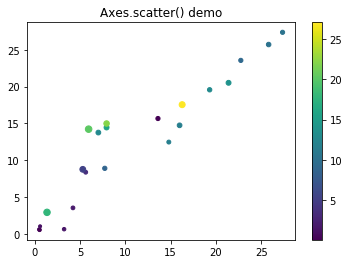

In [9]:
fig, ax = plt.subplots()
sc = ax.scatter(measurements[:,0],measurements[:,1],measurements[:,2],measurements[:,3])
plt.colorbar(sc)
plt.title("Axes.scatter() demo")
fig.savefig('measurements.png')

The third argument (`'-ro'`) in a call to `plot()` above is the format specifier string. This is a convenient way to set the style of the plot. In this example the first character '-' tells matplotib to use a solid line. Other options are ':','--','-.' for dotted, dashed, and dot-dashed lines respectively. The middle 'r' is for 'red', 'g','b','c','m','y', and 'k' are for  green, blue, cyan, magenta, yellow, and black respectively. The last character 'o' specifies the shape of the marker -- a circle. The list of all marker specifiers can be found [here](https://matplotlib.org/api/markers_api.html).

**Warning** Be careful when using `subplots()`. In a typical MATLAB style, this function output signature is inconsistent, it depends on the input. If you create a figure with a single axes, using a default call without arguments, then the second element of the output is the axes object. However, if you create a figure with multiple subplots, the second element of the output is an array of axes objects - one per subplot

### Time-series


Text(0.5,0.98,'Simulated waveform')

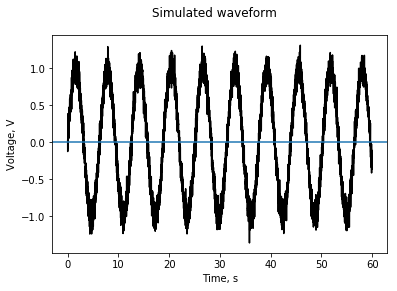

In [10]:
time = np.arange(0,60,0.01)
signal = np.sin(time)
noise = 0.1*np.random.randn(len(time))
fig, ax = plt.subplots()
ax.plot(time,signal+noise,'k-')
ax.axhline()
ax.set_ylabel('Voltage, V')
ax.set_xlabel('Time, s')
fig.suptitle('Simulated waveform')

### Joint bivariate distributions


Another type of data that is naturally two dimensional, are bivariate distributions. Density of bivariate distributions can be easily visualized using a scatter with translucent markers.

In [11]:
x = 2*np.random.randn(5000)
y = x+np.random.randn(5000)

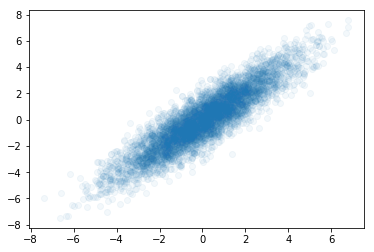

In [12]:
fig, ax = plt.subplots()
_=ax.scatter(x,y,alpha = 0.05)

Another way to represent the same data is a two-dimensional hisogram. This might be preferred for smaller samples.

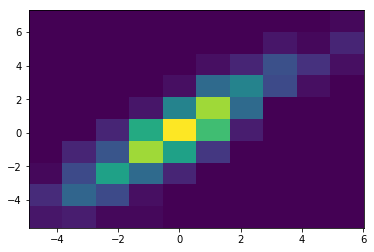

In [13]:
fig, ax = plt.subplots()
_=ax.hist2d(x[::10],y[::10])

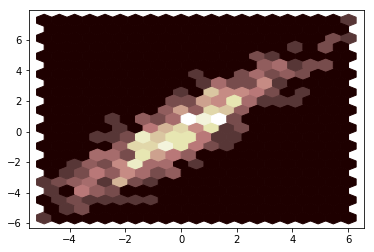

In [14]:
fig, ax = plt.subplots()
_=ax.hexbin(x[::10],y[::10],gridsize=20,cmap = 'pink')

Matplotlib also supports countour plots, but to build the contours from the sample additional processing is required. Seaborn and other add-on libraries provide functions that achieve the desired effect in a single line of code.

### Images

Matplotlib can display images represented as arrays of shape (n,m), (n,m,3) or (n,m,4). The first case is interpreted as a grayscale image, the second as an RGB image and the third as an RGB image with alpha channel. Let's make some nice gradients.

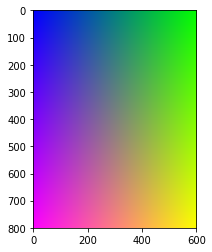

In [32]:
im = np.zeros((800,600,3))
im[:,:,0] = np.linspace(0,1,800)[:,None]
im[:,:,1] = np.linspace(0,1,600)[None,:]
im[:,:,2] = np.linspace(1,0,600)[None,:]
plt.imshow(im)

## Mathematical functions

We have alredy seen how to set titles, legend, xlabel and ylabel for the axes and add text annotations. All these functions can render mathematecal notation in latex syntax. This is as easy as placing the necessary latex commands within "$" characters. In this example we will plot a mathematical function and use `fill_between` to highlight the are under the curve.

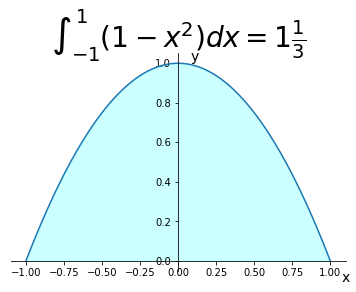

In [69]:
x = np.linspace(-1.,1.,1000)
y = -x*x+1.
fig,ax = plt.subplots()

ax.plot(x,y)
ax.fill_between(x,y,alpha=0.2,color='cyan')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.set_title('$\\int_{-1}^{1}(1-x^2)dx = 1\\frac{1}{3}$',fontdict={'size':28})
ax.set_xlabel('x',fontdict={'size':14})
ax.xaxis.set_label_coords(1.0, 0.0)
ax.set_ylabel('y',rotation=0,fontdict={'size':14})
ax.yaxis.set_label_coords(0.55, 0.95)


## Multi-D data

With multidimensional data the task is to transform it into one or several two-dimensional representations. Generally it implies loss of information, but this is the whole point: we want to omit all the nitty-gritty details and highlight the big picture, or some particual aspect of the data. Finding the data representation that makes sense for humans is at the core of Data Analysis --- a vast subject beyond the scope of this post. In certain simple cases, depending on the structure of the data, we might be able to visualize interesting features of the data without transforming it. Sometimes it might even be OK to visualize the data so as to keep all the information.

For example, the data that we loaded previously is actually the result of measurming the same quantity in the same objects using four different measurement methods. The `truth.csv` file contains reference values for this quantity.
So without any loss of information we may plot each column of our data versus the reference values overlaid on top of each other.

Adding overlays on the existing axis is as easy as calling additional plot methods.



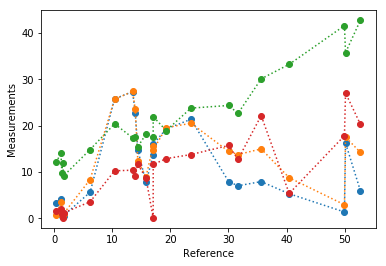

In [18]:
fig, ax = plt.subplots()
for m in range(measurements.shape[1]):
    ax.plot(truth,measurements[:,m],'o:')
ax.set_ylabel('Measurements')
ax.set_xlabel('Reference')
fig.savefig('out.pdf')

The same result can be obtained, by supplying the the entirety of the `measurements` variable to the `plot` method. MPL would cycle through that the last dimesion of the data and overlay the plot using a new color. The colors are assigned according to the default colormap.


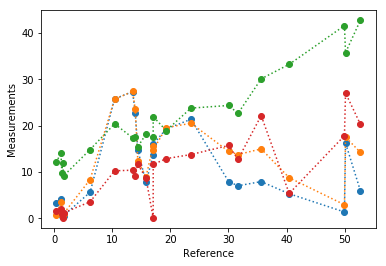

In [19]:
fig, ax = plt.subplots()
ax.plot(truth,measurements,'o:')
ax.set_ylabel('Measurements')
ax.set_xlabel('Reference')
fig.savefig('out.pdf')


The color cycle is the property of the axes object, so if you want to use non-default color cycle with this technique, you have to set the color cycle for the axes before calling `plot()`.

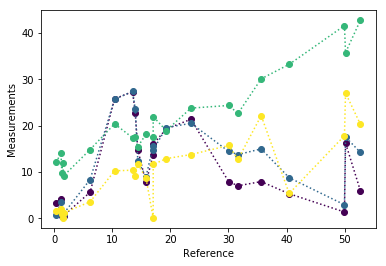

In [20]:
fig, ax = plt.subplots()
n = measurements.shape[1]
ax.set_prop_cycle('color',plt.cm.viridis(np.linspace(0, 1, n)))
ax.plot(truth,measurements,'o:')
ax.set_ylabel('Measurements')
ax.set_xlabel('Reference')
fig.savefig('out.pdf')

The figure above is quite messy, it would be more understandable if the plots were positioned side by side. This is done with additional arguments to `subplots()`. We can create several axes arranged in a regular grid within a single figure. The grid size is specified as integers in the first two arguments to `subplots`. Alternatively one can supple a tuple of vertical and horizontal grid dimensions as a first argument. Keep in mind that in this case subplots returns an array of axes instead of a single axes object as the second element of its output.

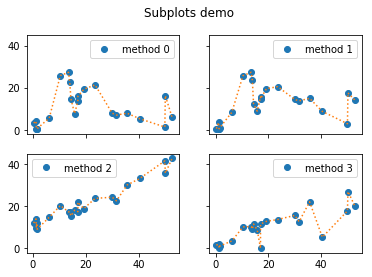

In [21]:
fig, ax_array = plt.subplots(2,2,sharex = 'all', sharey = 'all')
for i in range(measurements.shape[1]):
    ax_index =np.unravel_index(i,ax_array.shape) 
    ax_array[ax_index].plot(truth,measurements[:,i],'o',label='method '+str(i))
    ax_array[ax_index].plot(truth,measurements[:,i],':')
    ax_array[ax_index].legend()
plt.suptitle('Subplots demo')
fig.savefig('subplots.png')

Note the `sharex` and `sharey` arguments in the call to `subplots()` above. This way we ensure that the limits on the x and y axes are the same between all subplots.

## Saving

Saving your beautiful visualizations is as simple as a call to `savefig` method of the `Figure` object. 

Matplotlib will infer the file format from the extension, and you specify the output resolution for the bitmab formats in the `dpi` keyword argument.

In [23]:
fig.savefig('Figure.png', dpi=200)
fig.savefig('Figure.svg') # will use SVG vector backend

Use `plt.savefig()` to save the current figure if you lost track of the Figure object

# Conclusion
To conclude, MPL is an excellent library for exploratory data analysis and publication quality plotting. It has won its popularity by offering an easy to use procedural interface through pyplot state machine. At the same time it allows to control all aspects of plotting for advanced visualizations through its main object-oriented interface, which facilitates creation of maintainable modular code.

Because it is so easy to start using MPL is almost universally taught as the first graphics library in universities, so it's not going anywhere soon. That being said MPL is quite old and might feel clunky at times. Add-on libraries such as seaborn try to smooth the rough edges of MPL by offering an arsenal of advanced visualizations out of the box, better default settings and extending the procedural interface to aid with the more common tasks encountered during fine-tuning of the plots' appearance.

To see more examples of what MPL and seaborn are capable of take a look at the galleries on their respective official websites.
https://matplotlib.org/gallery.html
https://seaborn.pydata.org/examples/index.html
